# Testing p-values without the multiplier.


In [6]:
pd.read_table(' /home/groups/dpwall/briannac/blood_microbiome/intermediate_files/query_counts.sex_microbes/query_counts.sex_microbes.0000.tsv.gz')

In [90]:
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import scipy.stats as stats
import matplotlib.pyplot as plt
sys.path.append('/home/groups/dpwall/briannac/general_scripts/plotting/')
from pvals_distribution_plots import PlotPvals

N = 0

BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'

OUT_DIR = BLOOD_MICROBIOME_DIR + 'intermediate_files/query_counts.sex_microbes.pvals/pvals.%04d.txt' % N 

BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings.status=='Passed_QC_analysis_ready']

file = BLOOD_MICROBIOME_DIR + 'intermediate_files/query_counts.sex_microbes/query_counts.sex_microbes.%04d.tsv.gz' % N

total_covs = np.loadtxt('/home/groups/dpwall/briannac/y_chromosome_mismappings/results/coverages/all/total_coverages.tsv')

covs = pd.read_table(file, nrows=10)
samples = covs.columns

# Get pairings.
affected_pairs = []
unaffected_pairs = []
for f in set(bam_mappings.family):
    fam = bam_mappings[(bam_mappings.family==f) & (bam_mappings.relationship=='sibling')]
    affected_females = fam[(fam.sex_numeric=='2.0') & (fam.derived_affected_status=='autism')]
    affected_males = fam[(fam.sex_numeric=='1.0') & (fam.derived_affected_status=='autism')]
    unaffected_females = fam[(fam.sex_numeric=='2.0') & (pd.isna(fam.derived_affected_status))]
    unaffected_males = fam[(fam.sex_numeric=='1.0') & (pd.isna(fam.derived_affected_status))]
    
    affected_pairs = affected_pairs + [(i,j) for i in affected_females.index for j in affected_males.index if ((i in samples) and (j in samples))]
    unaffected_pairs = unaffected_pairs + [(i,j) for i in unaffected_females.index for j in unaffected_males.index if ((i in samples) and (j in samples))]
males = [m for f,m in (affected_pairs + unaffected_pairs)]
females = [f for f,m in (affected_pairs + unaffected_pairs)]    

In [99]:
wilcox_scores=[[2,2], [3,3]]
[wil for wil,w in wilcox_scores]

[2, 3]

In [91]:
pvals = np.zeros(10000) + np.nan
#mult = 1.0159 #p.median(covs[males].values.flatten())/np.median(covs[females].values.flatten())
for covs in pd.read_table(file, chunksize=10000):
    print(covs.index[0])
    covs_norm = covs[abs(covs[males].values-covs[females].values).sum(axis=1)>0]
    pvals[covs_norm.index] = [stats.wilcoxon(q[1][males], q[1][females], alternative='greater').pvalue for q in covs_norm.iterrows()]
pvals = pvals[:(covs.index[-1]+1)]

0


/home/users/briannac/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


10000


IndexError: index 10000 is out of bounds for axis 0 with size 10000

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


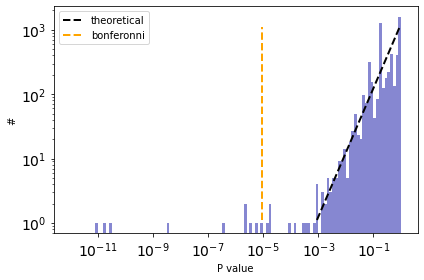

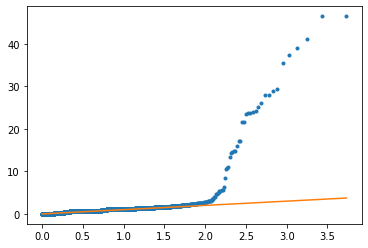

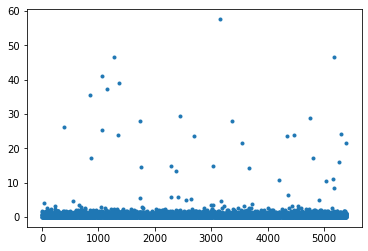

In [92]:
pvals_new = pvals[~np.isnan(pvals)]
expected = np.arange(0,len(pvals_new))/len(pvals_new)
PlotPvals(pvals_new)

plt.figure()
plt.plot(sorted(-np.log10(expected)), sorted(-np.log10(pvals_new)), '.')
plt.plot(sorted(-np.log10(expected)), sorted(-np.log10(expected)), '-')
#plt.ylim(0,np.nanmax(-np.log10(expected[1:]))*2)
plt.show()
plt.plot(-np.log10(pvals_new), '.')
plt.show()

(array([ 529.,  950.,  205., 2221.,  229.,  314.,  259.,  186.,  113.,
         393.]),
 array([5.35587864e-58, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

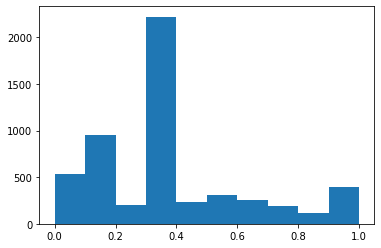

In [93]:
plt.hist([2*min(p, 1-p) for p in pvals_new])

In [94]:
np.where(pvals<(.05/2e10))
#np.nanmin(pvals)

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(array([ 727, 1588, 1617, 1984, 1989, 2159, 2420, 2521, 2574, 3233, 3247,
        4255, 4426, 4568, 5006, 5599, 5903, 6303, 6599, 6800, 8051, 8250,
        8794, 8902, 9609, 9757, 9831, 9986]),)

In [95]:
covs = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/query_counts.sex_microbes/query_counts.sex_microbes.0000.tsv.gz', nrows=2000)
covs.loc[8].sum()

16

In [64]:
kmers[1989]

NameError: name 'kmers' is not defined

(array([383.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]),
 <BarContainer object of 10 artists>)

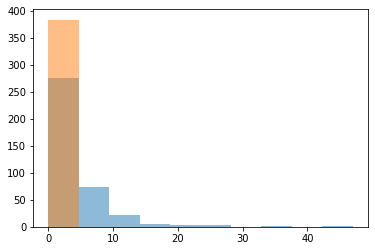

In [97]:
n = plt.hist(covs.loc[1588][males], alpha=.5, bins=10)
plt.hist(covs.loc[1588][females], alpha=.5, bins=n[1])

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


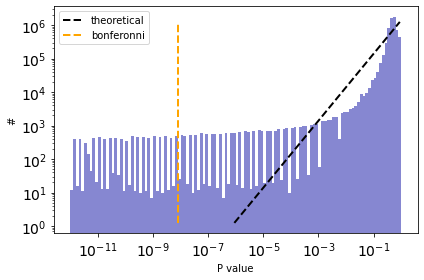

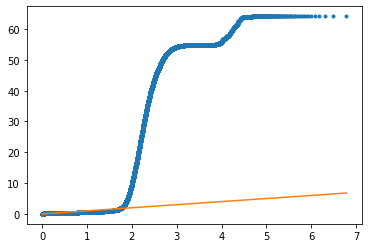

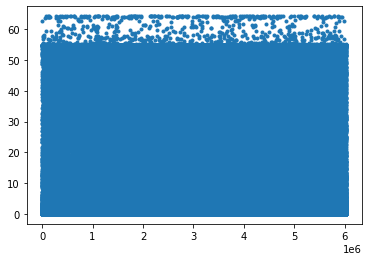

In [9]:
expected = np.arange(0,len(pvals_new))/len(pvals_new)
PlotPvals(pvals_new)

plt.figure()
plt.plot(sorted(-np.log10(expected)), sorted(-np.log10(pvals_new)), '.')
plt.plot(sorted(-np.log10(expected)), sorted(-np.log10(expected)), '-')
#plt.ylim(0,np.nanmax(-np.log10(expected[1:]))*2)
plt.show()
plt.plot(-np.log10(pvals_new), '.')
plt.show()

In [27]:
pvals = np.zeros(10000) + np.nan
eps=1e-20
mult = 6.37/6.27 #p.median(covs[males].values.flatten())/np.median(covs[females].values.flatten())
for covs in pd.read_table(file, chunksize=10000):
    print(covs.index[0])
    #covs_norm = covs.apply(lambda x: x/total_covs, axis=1)
    #covs_norm.replace(0,np.nan, inplace=True)
    covs_norm = covs[((covs[males+females]>0).sum(axis=1)>2)]
    pvals[covs_norm.index] = [stats.wilcoxon(q[1][males]+eps, mult*q[1][females]+eps, alternative='greater', zero_method='zsplit').pvalue for q in covs_norm.iterrows()]
pvals = pvals[:(covs.index[-1]+1)]
#np.savetxt(OUT_DIR, pvals)

NameError: name 'file' is not defined

In [11]:
pvals_new = pvals[:(covs.index[0])]
pvals_new = pvals_new[~np.isnan(pvals_new)]

In [28]:
len(pvals[pvals<(.05/sum(~np.isnan(pvals)))])

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


100

7843

In [14]:
import matplotlib.pyplot as plt

In [22]:
expected

array([0.00000000e+00, 1.27502231e-04, 2.55004463e-04, ...,
       9.99617493e-01, 9.99744996e-01, 9.99872498e-01])

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


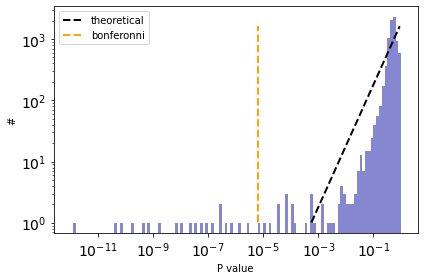

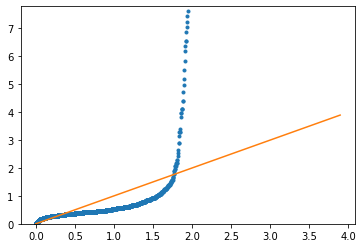

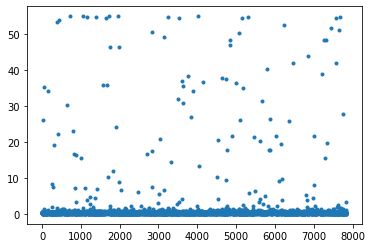

In [24]:
expected = np.arange(0,len(pvals_new))/len(pvals_new)
PlotPvals(pvals_new)
plt.figure()
plt.plot(sorted(-np.log10(expected)), sorted(-np.log10(pvals_new)), '.')
plt.plot(sorted(-np.log10(expected)), sorted(-np.log10(expected)), '-')
plt.ylim(0,np.nanmax(-np.log10(expected[1:]))*2)
plt.show()
plt.plot(-np.log10(pvals_new), '.')
plt.show()

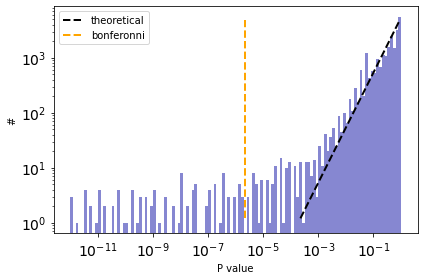

In [75]:

PlotPvals(pvals_new[~np.isnan(pvals_new)])

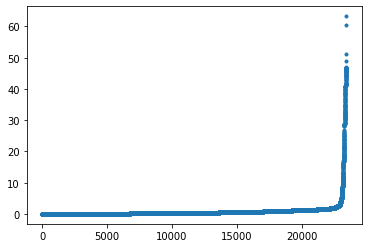

In [104]:
plt.plot(sorted(-np.log10(pvals_new[~np.isnan(pvals_new)])), '.')

(array([4775., 2186., 1963., 1790., 1151., 2390., 1776., 1865., 2240.,
        3299.]),
 array([5.37272511e-64, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

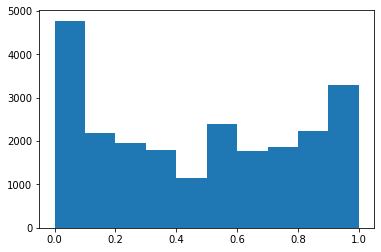

In [117]:
plt.hist(pvals_new)

(array([2344., 2343., 2344., 2343., 2343., 2344., 2343., 2344., 2343.,
        2344.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

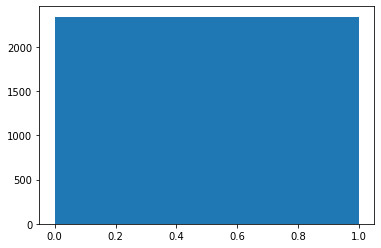

In [99]:
plt.hist(np.linspace(0,1,len(pvals_new[~np.isnan(pvals_new)])))

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


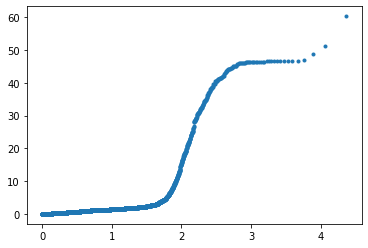

In [95]:
plt.plot(-np.log10(np.linspace(0,1,len(pvals_new[~np.isnan(pvals_new)])))[::-1], 
         sorted(-np.log10(pvals_new[~np.isnan(pvals_new)])), '.')

In [115]:
np.arange(0,len(pvals_new))

array([    0,     1,     2, ..., 23432, 23433, 23434])

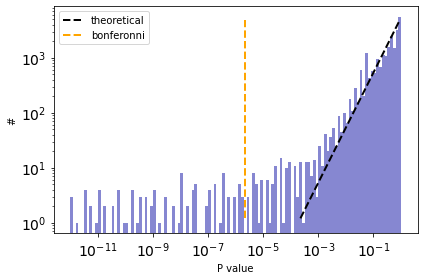

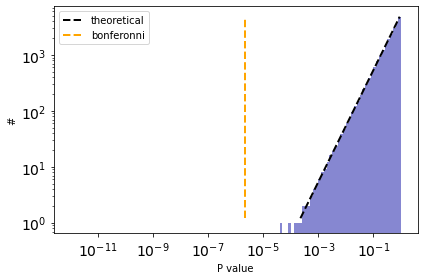

In [116]:
expected = np.arange(0,len(pvals_new))/len(pvals_new)
PlotPvals(pvals_new)
plt.figure()
PlotPvals(expected)

In [2]:
import glob
','.join(set(['%04d' % i for i in range(232)]).difference(
    set([f.split('.')[-2] for f in glob.glob('/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/query_counts.sex_microbes.pvals/pvals*.txt')])))

'0080,0164,0101,0074,0051,0136,0079,0231,0072'

In [32]:
pvals = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/pvals_and_kmers.txt', nrows=1000000, header=None, )
pvals.columns = ['kmers', 'pval']

In [38]:
pvals = pvals[~pd.isna(pvals.pval)]

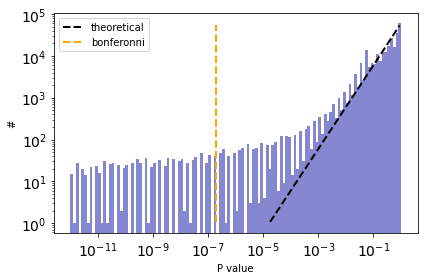

In [40]:
PlotPvals(pvals.pval)

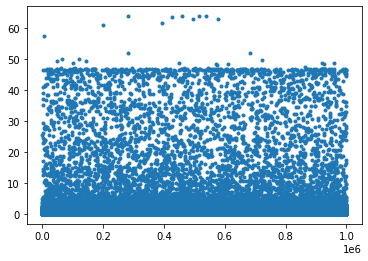

In [41]:
plt.plot(-np.log10(pvals.pval), '.')

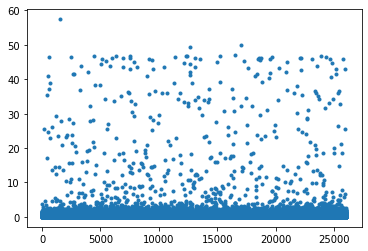

In [10]:
plt.plot(-np.log10(pvals), '.')

In [159]:
sorted(query_counts.loc[idx].values)[-20:]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4]

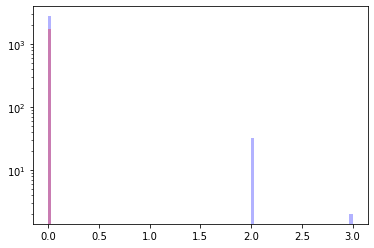

In [161]:
idx = np.argsort(pvals)[120]
bins = np.linspace(min(query_counts.loc[idx]), max(query_counts.loc[idx]), 100)
plt.hist(male_counts.iloc[idx].values, alpha=.3, bins=bins, color='b')
plt.hist(female_counts.iloc[idx].values, alpha=.3, bins=bins, color='r')
plt.yscale('log')
plt.show()


In [109]:
sorted(pvals)[100]

1.437490491972144e-07

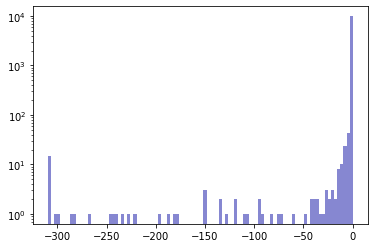

In [55]:
males = bam_mappings[bam_mappings.sex_numeric=='1.0'].index
females = bam_mappings[bam_mappings.sex_numeric=='2.0'].index
male_counts = query_counts[males]
female_counts = query_counts[females]
pvals = stats.ttest_ind(male_counts.transpose(), female_counts.transpose()).pvalue
pvals[pvals==0] = min(pvals[pvals!=0])
plt.hist(np.log10(pvals), bins=100)
plt.yscale('log')
plt.show()

# Get y associated contigs.

In [2]:
f_regress_results = pd.read_csv(F_REGRESSION_RESULTS, header=None)
f_regress_results.drop(0, inplace=True, axis=1)
f_regress_results.columns = ['name', 'exog_value', 'coeff']
f_regress_results['coeff_abs'] = abs(f_regress_results.coeff)

In [3]:
y_associated_contigs = f_regress_results[f_regress_results.exog_value=='sex_numeric_2.0'].sort_values(
    'coeff_abs', ascending=False)
y_associated_contigs = y_associated_contigs[y_associated_contigs.coeff<0][['name']].drop_duplicates().name.values
y_associated_contigs


x_associated_contigs = f_regress_results[f_regress_results.exog_value=='sex_numeric_2.0'].sort_values(
    'coeff_abs', ascending=False)
x_associated_contigs = x_associated_contigs[x_associated_contigs.coeff>0][['name']].drop_duplicates().name.values

In [4]:
taxonomies = pd.read_csv('/home/groups/dpwall/briannac/blood_microbiome/data/kraken_align/taxonomies.tsv', sep='\t', header=None)
taxonomies.columns = ['frac', 'n', '2', 'tax_level', 'tax_id', 'tax_name']
taxonomies.tax_name = [''.join(n[np.where(np.array(list(n))!=' ')[0][0]:]) for n in taxonomies.tax_name]

In [5]:
y_taxonomies = taxonomies[[n in y_associated_contigs for n in taxonomies.tax_name]]
y_taxonomies = y_taxonomies[y_taxonomies.tax_id!=9606]

In [21]:
with open(TAX_IDS_TO_GREP_FILE, 'w') as f:
    for i in [r"kraken:taxid%s$" % str(t)  for t in y_taxonomies.tax_id]:
        f.write(i + '\n')
with open(TAX_NAMES_TO_GREP_FILE, 'w') as f:
    for i in [r"(taxid %s)" % str(t)  for t in y_taxonomies.tax_id]:
        f.write(i + '\n')
        
##kraken:tax_id\|1560339$
#kraken:tax_id\|28901$

In [3]:
kraken_classes = pd.read_table(
    '/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/y_chrom_association/all.tsv',
    header=None)
kraken_classes.columns = ['sample', 'read_id', 'tax_id', 'seq', 'read_id_dup', 'tax_name', 'kmer_length', 'kmer_classes']
kraken_classes.drop(['read_id_dup', 'kmer_length'], inplace=True, axis=1)

In [4]:
kraken_classes.columns = ['sample', 'read_id', 'tax_id', 'seq', 'read_id_dup', 'tax_name', 'kmer_length', 'kmer_classes']
kraken_classes.drop(['read_id_dup', 'kmer_length'], inplace=True, axis=1)

In [20]:
Counter(kraken_classes.tax_id).most_common(20)

[(28901, 4463299),
 (1653831, 1705889),
 (1560339, 1504768),
 (446, 618201),
 (336810, 514723),
 (28450, 458685),
 (1313, 431869),
 (630, 385493),
 (454, 367113),
 (9, 323836),
 (2731756, 260955),
 (362837, 155333),
 (1742359, 146628),
 (2675773, 113866),
 (164514, 92552),
 (96345, 90484),
 (1491, 82878),
 (1502, 62466),
 (1922217, 61960),
 (2683967, 58429)]

In [171]:
tax_id = 1278232
df_pivot = pd.pivot_table(kraken_classes[kraken_classes.tax_id>336810].groupby(['seq', 'sample']).count()[['read_id']].reset_index(), values='read_id', index='seq', columns='sample')
df_pivot[pd.isna(df_pivot)]=0
df_pivot['mean'] = df_pivot.mean(axis=1)

In [161]:
df_pivot.sort_values('mean', ascending=False).iloc[:10]

sample,02C10540,02C10541,02C10542,02C10543,02C10702,02C10704,02C10855,02C10856,02C10857,02C10858,...,02C12260,02C12341,02C12342,02C12343,02C12344,02C12373,02C12374,02C12376,02C12627,mean
seq,,,,,,,,,,,,,,,,,,,,,
TTATATATAACTGTATAATATTTTATGTAAATATGTAATATAATATATATAACTATATAATATATTATATATAACTATATATTATGTTATATATACTTTTATAACATAATTTACATAAAATATCATAATATAATATATATTATATTATTTA,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,5.0,...,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.686869
TGGGTGATATGTAATATATATTATGTAATATGAAATAATATAATATATATTATATTATGATATTTTATGTAAATTATGTTATAAAAGTATATATAACATAATATATAGTTATATATAATATATTATATAGTTATATATATTATATTATATA,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.787879
AACTGTATAATATTTTATGTAAATATGTAATATAATATATATAACTATATAATATATTATATATAACTATATATTATGTTATATATACTTTTATAACATAATTTACATAAAATATCATAATATAATATATATTATATTATTTTATATTACA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.767677
TATATGTTTTATATTCTGTTATATATAACTATTTGAAATTATATATAACTGTATAATATTTTATGTAAATATGTAATATAATATATATAACTATATAATATATTATATATAACTATATATTATGTTATATATACTTTTATAATATAATTTA,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707071
TAATATGAAATAATATAATATATATTATATTATGATATTTTATGTAAATTATGTTATAAAAGTATATATAACATAATATATAGTTATATATAATATATTATATAGTTATATATATTATATTACATATTTACATAAAATATTATAAAGTTAT,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.696970
TATATGTTTTATATTCTGTTATATATAACTATTTGAAATTATATATAACTGTATAATATTTTATGTAAATATGTAATATAATATATATAACTATATAATATATTATATATAACTATATATTATGTTATATATACTTTTATAAAATAATTTA,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.606061
GACATTTTATGTAAATTATGTTATAAAAGTATATATAACATAATATATAGTTATATATAATATATTATATAGTTATATATATTATATTACATATTTACATAAAATATTATACAGTTATATATAATTTCAAATAGTTATATATAACAGAATA,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.565657
TATTCTGTTATATATAACTATTTGAAATTATATATAACTGTATAATATTTTATGTAAATATGTAATATAATATATATAACTATATAATATATTATATATAACTATATATTATGTTATATATACTTTTATAACATAATTTACATAAAATGTC,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556
TCTATATGTTATATATTCTGTTATATATAACTGTTTGAAATTATATATAACTGTATAATATTTTAGGTAAATATGTAATATAATATATATAACTTTATAATATATTATATATAACTATATATTATGTTATATATACTTTTATAACATAATT,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505051


In [172]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df_pivot.drop('mean',  axis=1).transpose()
pca = PCA(n_components=100)


In [167]:
s = StandardScaler()
s.fit(X[(bam_mappings.loc[X.index]['sex_numeric']=='2.0').values])
X_norm = s.transform(X[(bam_mappings.loc[X.index]['sex_numeric']=='2.0').values])
pca.fit(X[(bam_mappings.loc[X.index]['sex_numeric']=='2.0').values])
transform = pd.DataFrame(pca.transform(X))
#transform_females = transform[(bam_mappings.loc[X.index]['sex_numeric']=='2.0').values]
#transform_males = transform[(bam_mappings.loc[X.index]['sex_numeric']=='1.0').values]

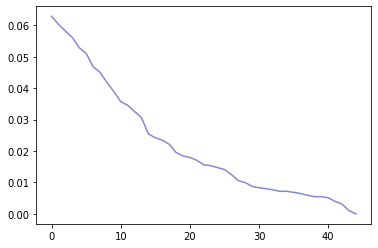

In [169]:
plt.plot(pca.explained_variance_ratio_)

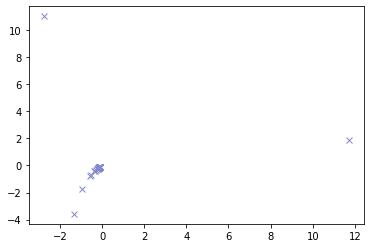

In [170]:
plt.plot(transform[0], transform[1], 'x')

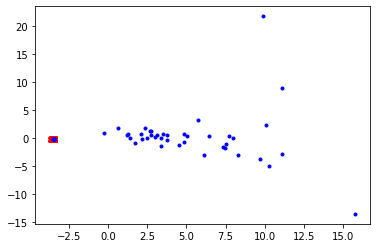

In [153]:
plt.plot(transform_females[0], transform_females[1], 'rX')
plt.plot(transform_males[0], transform_males[1], 'b.')


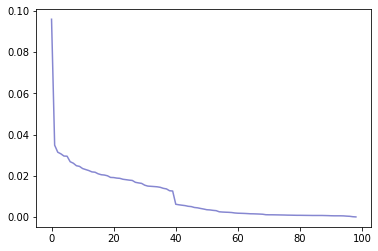

In [154]:
plt.plot(pca.explained_variance_ratio_)

In [124]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

In [40]:
bam_mappings.loc['02C12373'][['sex_numeric', 'family', 'relationship']]

sex_numeric        1.0
family          AU0866
relationship    father
Name: 02C12373, dtype: object

In [166]:
kmers = kraken_classes[['sample', 'tax_id', 'kmer_classes_list']].groupby(['sample']).aggregate(lambda x:Counter([i for j in list(x) for i in j]).most_common())

In [173]:
kmers.kmer_classes_list[0][0]

('ATTTTATAACATATGTAATATATATTATATATTAT', 10816)

In [125]:
def KrakenToKmers(row):
    kraken_format_out = row['kmer_classes']
    desired_tax_id  = str(row['tax_id'])
    seq  = row['seq']
    
    tax_ids_n_seqs = [(i.split(':')[0],int(i.split(':')[1])) for i in  (kraken_format_out+ ' ').split(' ') if i!='']
    i = 0
    a = []
    for tax_id, n_seq in tax_ids_n_seqs:
        if tax_id == desired_tax_id:
            a = a + [seq[(i+s):(i+s+35)]for s in range(n_seq)]
        i = i + n_seq
    return a

kraken_classes['kmer_classes_list'] = kraken_classes.apply(KrakenToKmers, axis=1)